# DECISION TREE 28/01 --> LECTURE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('SUV_data.csv')
df

,Age,Salary,Purchased
0,56,45342,1
1,46,57157,1
2,32,87863,1
3,25,72083,0
4,38,85733,1
...,...,...,...
195,23,40056,0
196,49,65543,1
197,21,76556,1
198,28,23343,0


In [ ]:
X = df[['Age' , 'Salary']]
y = df['Purchased']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state =42)

NameError: name 'df' is not defined

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train , y_train)

DecisionTreeClassifier()

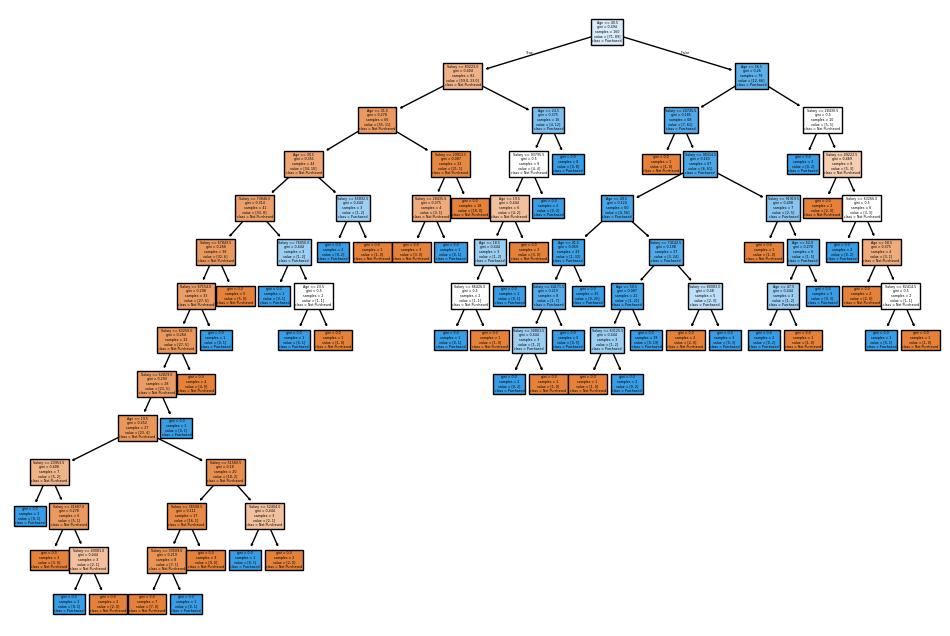

In [ ]:
plt.figure(figsize = (12 , 8))
plot_tree(model , feature_names = ['Age','Salary'], class_names = ['Not Purchased' , 'Purchased'],filled = True)
plt.show()

In [ ]:
# train data accuracy
accuracy_score(y_train , model.predict(X_train))

1.0

In [ ]:
# test data accuracy
accuracy_score(y_test , model.predict(X_test))

0.775

In [ ]:
# SINCE WE ARE GETTING 100% ACCURACY WITH TRAINING MODEL AND 0.77 USING
# TEST MODEL IT LEADS TO A CONCLUSION KNOWS AS OVERFITTING

In [ ]:
# To fix overfitting we use "HYPERPARAMTERS" to limit tree's growth.
model = DecisionTreeClassifier(max_depth =2)
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
accuracy_score(y_train , model.predict(X_train))

0.83125

In [ ]:
accuracy_score(y_test , model.predict(X_test))

0.8

In [ ]:
# We can control it even more precisely .
model = DecisionTreeClassifier(max_depth = 2 , min_samples_split = 10, min_samples_leaf = 5)
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10)

In [ ]:
# We can use GRIDSEARCHCV to try every combination instead of guessing them
param_grid = {'max_depth' : [2,3,4,5] , 'min_samples_split' : [2,5,10] , 'min_samples_leaf' : [1,2,5]}

grid = GridSearchCV(DecisionTreeClassifier() , param_grid , cv = 5)
grid.fit(X_train , y_train)
print("Best Params: " , grid.best_params_)

Best Params:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


# DECISION TREE LAB - 28/01

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Dropping unrequired rows.
df.drop(['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , axis = 1 , inplace = True)

In [ ]:
# Median replaced in Age column
df['Age'].fillna(df['Age'].median() , inplace = True)

/tmp/ipython-input-2211513290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median() , inplace = True)


In [ ]:
# Replacing embark using mode
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace = True)

/tmp/ipython-input-1952697304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace = True)


In [ ]:
# Using label encoding for Embarked , Sex -> for only two else use one-hot encoding.
le = LabelEncoder()
# df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

# one-hot encoding
df = pd.get_dummies(df , columns = ['Embarked'], drop_first=True)

In [ ]:
# Feature scaling the data ( Not neccessary )
# scaler = StandardScaler()
# df[['Age' , 'Fare']] = scaler.fit_transform(df[['Age' , 'Fare']])

In [ ]:
# Splitting into train and test datasets
X = df.drop('Survived' , axis = 1)
y = df['Survived']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [ ]:
model = DecisionTreeClassifier(max_depth= 1,criterion = 'gini')
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
accuracy_score(y_train , model.predict(X_train))

0.7879213483146067

In [ ]:
accuracy_score(y_test , model.predict(X_test))

0.7821229050279329

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_train = model.predict(X_train)
print(f"Accuracy_Train:  {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Precision_Train: {precision_score(y_train, y_pred_train):.4f}")
print(f"Recall_Train:    {recall_score(y_train, y_pred_train):.4f}")
print(f"F1 Score_Train:  {f1_score(y_train, y_pred_train):.4f}")
print("\n")

Accuracy_Train:  0.7879
Precision_Train: 0.7388
Recall_Train:    0.6754
F1 Score_Train:  0.7057




In [ ]:
y_pred_test = model.predict(X_test)
print(f"Accuracy_Train:  {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision_Train: {precision_score(y_test,y_pred_test):.4f}")
print(f"Recall_Train:    {recall_score(y_test, y_pred_test):.4f}")
print(f"F1 Score_Train:  {f1_score(y_test, y_pred_test):.4f}")
print("\n")

Accuracy_Train:  0.7821
Precision_Train: 0.7536
Recall_Train:    0.7027
F1 Score_Train:  0.7273




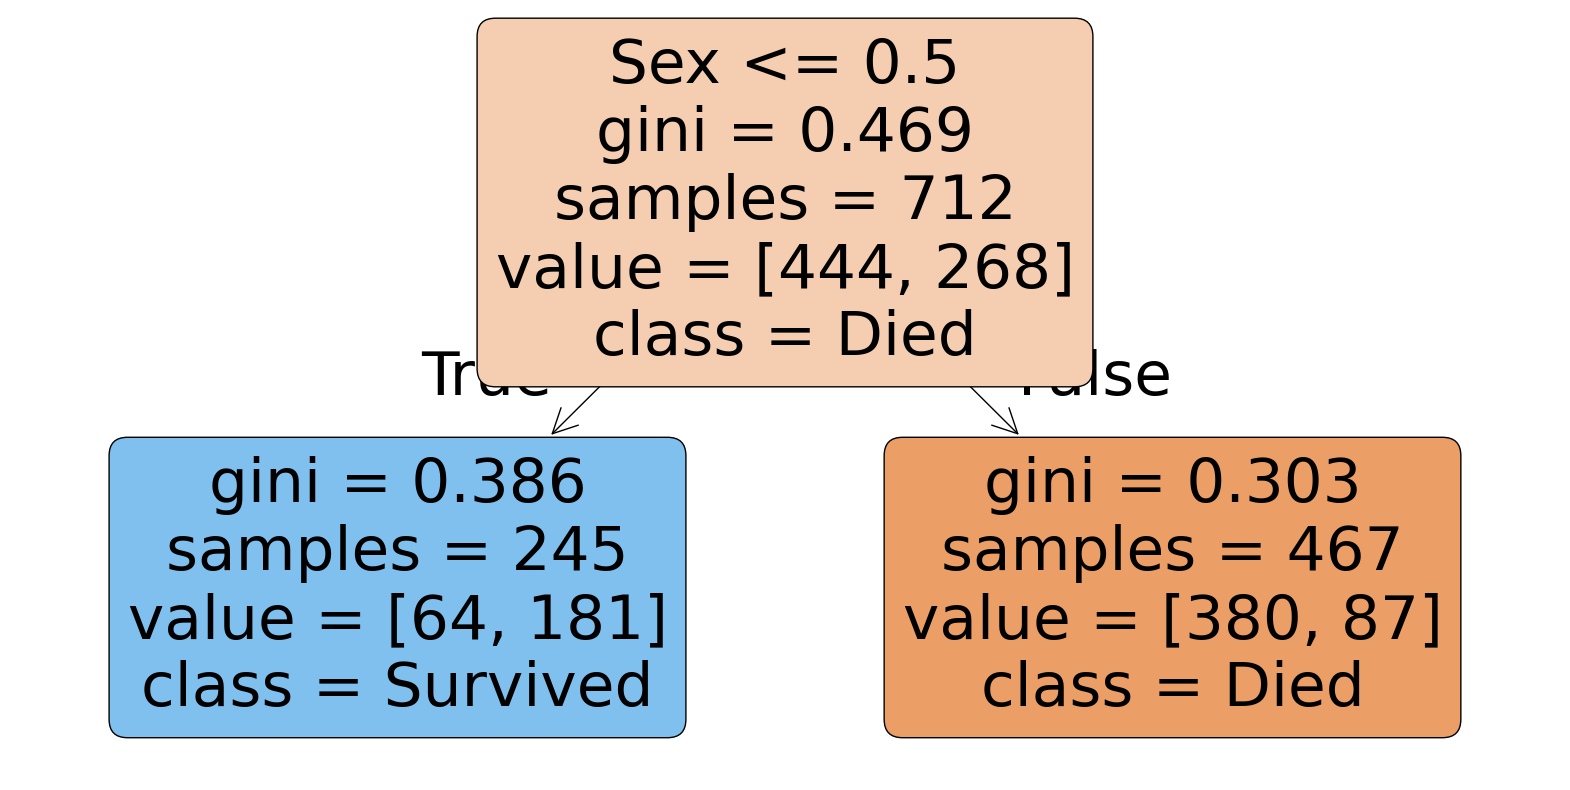

In [ ]:
features = X.columns
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=['Died', 'Survived'], filled=True, rounded=True)
plt.show()